<a href="https://colab.research.google.com/github/reitezuz/notebooks-for-NES2-2024/blob/main/lecture_02/simple_example_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The first example - simple Keras MLP model (step by step)


## Load, view and analyze the data




In [2]:
# Load the MNIST dataset

import keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()



In [2]:
# 60000 training samples - images 28x28 in greyscale
print(train_images.shape, train_labels.shape)

# 10000 testing samples - images 28x28 in greyscale
print(test_images.shape, test_labels.shape)

# 10 categories
print(len(train_images), train_labels[:10])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
60000 [5 0 4 1 9 2 1 3 1 4]


Training data statistics:
Number of samples: 60000
Image shape: (28, 28)
Mean pixel value: 33.318421449829934
Standard deviation of pixel values: 78.56748998339798
Extremes of pixel values: 0 255
Label distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]

Testing data statistics:
Number of samples: 10000
Image shape: (28, 28)
Mean pixel value: 33.791224489795916
Extremes of pixel values: 0 255
Standard deviation of pixel values: 79.17246322228644
Label distribution: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


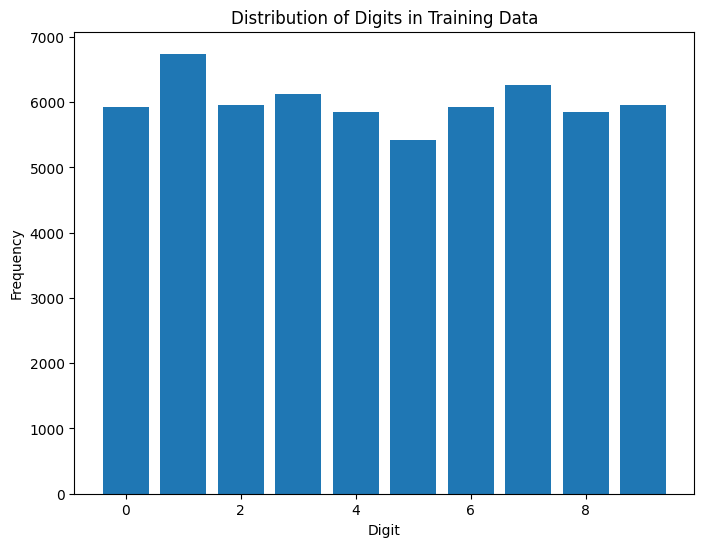

Number of missing values in training images: 0
Number of missing values in test images: 0


In [3]:
# Basic statistics of the data
import matplotlib.pyplot as plt
import numpy as np

print("Training data statistics:")
print("Number of samples:", len(train_images))
print("Image shape:", train_images.shape[1:])
print("Mean pixel value:", np.mean(train_images))
print("Standard deviation of pixel values:", np.std(train_images))
print("Extremes of pixel values:", np.min(train_images), np.max(train_images))
print("Label distribution:", np.bincount(train_labels))

print("\nTesting data statistics:")
print("Number of samples:", len(test_images))
print("Image shape:", test_images.shape[1:])
print("Mean pixel value:", np.mean(test_images))
print("Extremes of pixel values:", np.min(train_images), np.max(train_images))
print("Standard deviation of pixel values:", np.std(test_images))
print("Label distribution:", np.bincount(test_labels))

# Analyze the label distribution
label_counts = np.bincount(train_labels)
plt.figure(figsize=(8, 6))
plt.bar(range(10), label_counts)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Distribution of Digits in Training Data")
plt.show()

# Check for missing values
print("Number of missing values in training images:", np.sum(np.isnan(train_images)))
print("Number of missing values in test images:", np.sum(np.isnan(test_images)))

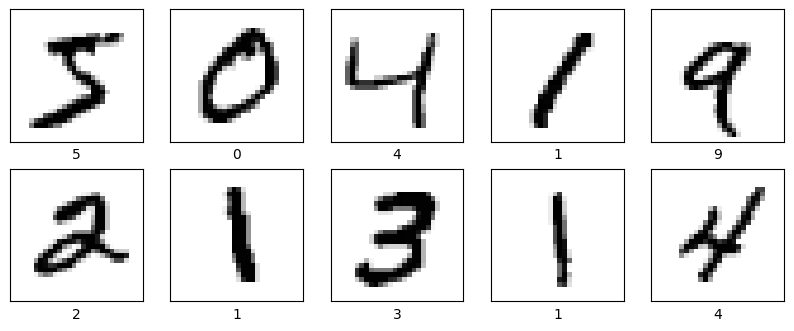

In [4]:
# Display some images

import matplotlib.pyplot as plt

# Display the first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Remove axis ticks and the grids
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Display the current image using a binary color map
    plt.xlabel(train_labels[i])
plt.show()


## Preprocess the data


*   Depends on the character of the data and on the chosen model




In [21]:
# 1a. Reshape and normalize the data:
# reshape the data into a flat vector (784 elements) for input to our neural network.
x_train_0 = train_images.reshape(60000, 28 * 28)
x_test_0 = test_images.reshape(10000, 28 * 28)
y_train = train_labels
y_test = test_labels

# 1b. Convert the pixel values from integers [0-255] to floating-point numbers and normalize them to the range [0, 1].
x_train = x_train_0.astype('float32') / 255
x_test = x_test_0.astype('float32') / 255

# 2. Resolve the missing values,...

# 3. Do some image augmentation,...

# 4. Arbitrary: one-hot encode the labels:
# For example, the label 3 would become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical  = keras.utils.to_categorical(y_test, num_classes=10)

# print(y_train[:3])
# print(y_train_categorical[:3])

# 3. Split the data:
# The training data can be further split into training and validation sets.
# The validation set is used to monitor the performance of the model during training and prevent overfitting.

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)



In [6]:
# Alternative data normalization: standard scaling to center the data around zero and achieve a unit standard deviation

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_s = scaler.fit_transform(x_train_0)

# Transform the test and validation data using the same scaler
x_test_s = scaler.transform(x_test_0)

# Mean and standard deviation for the two variants of normalization:
print(np.mean(x_train_s), np.std(x_train_s), np.mean(x_test_s), np.std(x_test_s))
print(np.mean(x_train), np.std(x_train), np.mean(x_test), np.std(x_test))

-2.1974863349995617e-18 0.9563162742140049 0.002495697308915079 0.9571450819920649
0.13078003 0.3082389 0.13251467 0.31048027


## Define the model architecture

In [7]:
import keras

model = keras.Sequential([
    keras.layers.InputLayer(shape=(28 * 28,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Set model parameters:


In [8]:
'''
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
# optimizer ... training algorithm
# loss ... error/loss function
# metrics ... for evaluation

model.compile(optimizer= keras.optimizers.SGD(learning_rate = 0.001),             # 'sgd'
              loss= keras.losses.SparseCategoricalCrossentropy(),                 #'sparse_categorical_crossentropy',
              metrics= [keras.metrics.SparseCategoricalCrossentropy("accuracy")]) #['accuracy'])


## Train the model

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))



Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 2.2794 - loss: 2.2794 - val_accuracy: 1.9274 - val_loss: 1.9274
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.8290 - loss: 1.8290 - val_accuracy: 1.5797 - val_loss: 1.5797
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.5064 - loss: 1.5064 - val_accuracy: 1.3175 - val_loss: 1.3175
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.2628 - loss: 1.2628 - val_accuracy: 1.1251 - val_loss: 1.1251
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0855 - loss: 1.0855 - val_accuracy: 0.9847 - val_loss: 0.9847


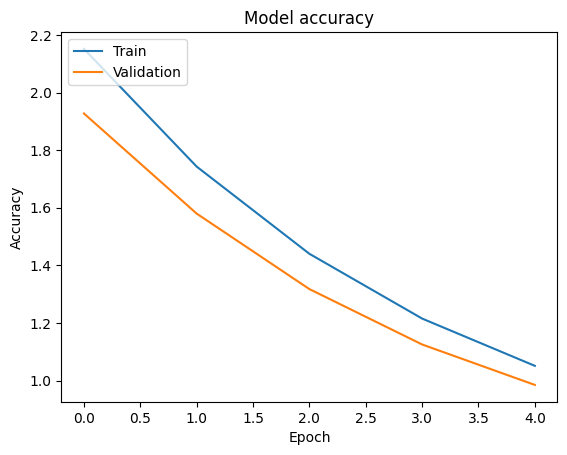

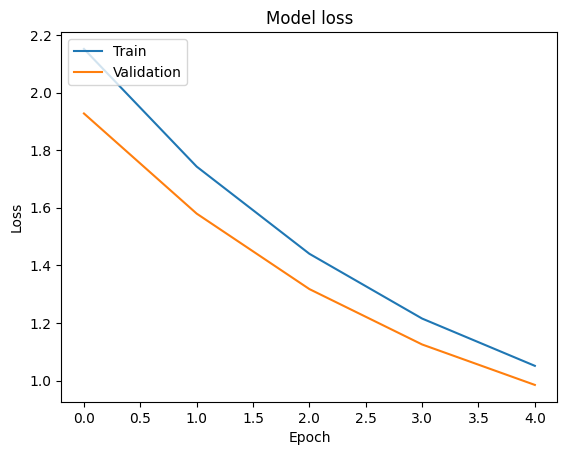

In [10]:
# plot the training progress:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Evaluate the model and make predictions on new data

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0317 - loss: 1.0317
Test accuracy: 0.9586014747619629 
Test loss: 0.9586014747619629


In [12]:
# Make predictions on test data
predictions = model.predict(x_test)
print(predictions[:2])

# predicted class:
print(predictions[0].argmax(), predictions[0][predictions[0].argmax()], test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.0183503  0.01058914 0.01947103 0.04396007 0.0574122  0.03102532
  0.01116754 0.6590047  0.04062227 0.10839737]
 [0.05447181 0.09452648 0.23803979 0.1919115  0.01188681 0.08387873
  0.21127895 0.00796113 0.09158268 0.01446215]]
7 0.6590047 7


In [13]:
# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_classes[:10])
print("True labels:", y_test[:10])

# Misclassified indices:
misclassified_indices = np.where(predicted_classes != y_test)[0]
num_misclassified = len(misclassified_indices)
print("Number of misclassified images:", num_misclassified, "out of", len(y_test), ", accuracy", test_acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)


Predicted labels: [7 2 1 0 4 1 4 9 6 9]
True labels: [7 2 1 0 4 1 4 9 5 9]
Number of misclassified images: 1734 out of 10000 , accuracy 0.9586014747619629


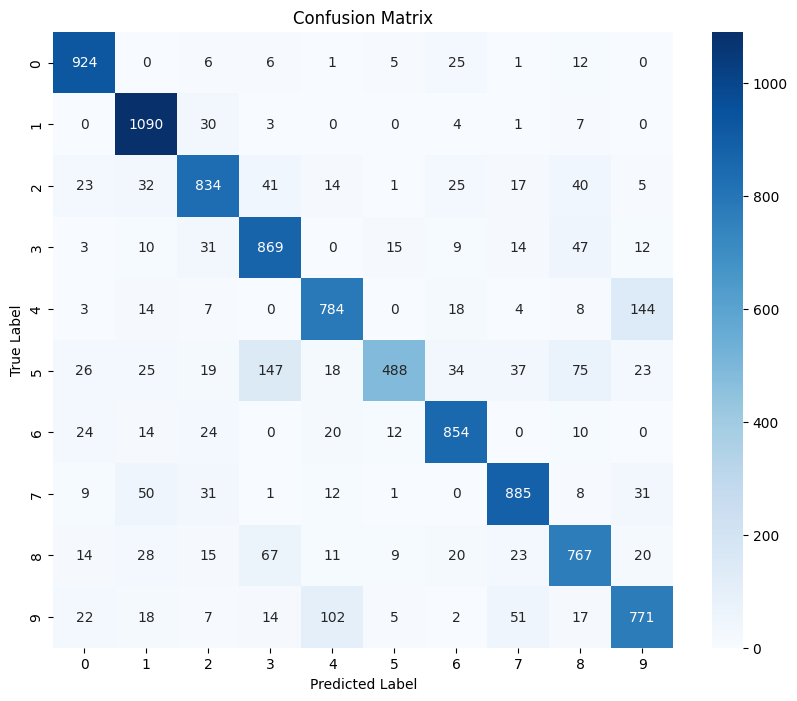

In [14]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

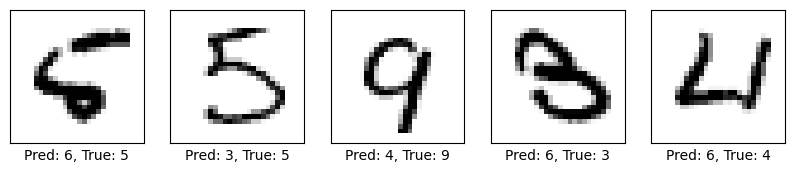

In [15]:
# Plot some misclassified images
num_images_to_plot = 5
plt.figure(figsize=(10, 10))
for i in range(min(num_images_to_plot, len(misclassified_indices))):
    index = misclassified_indices[i]
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {predicted_classes[index]}, True: {y_test[index]}")
plt.show()

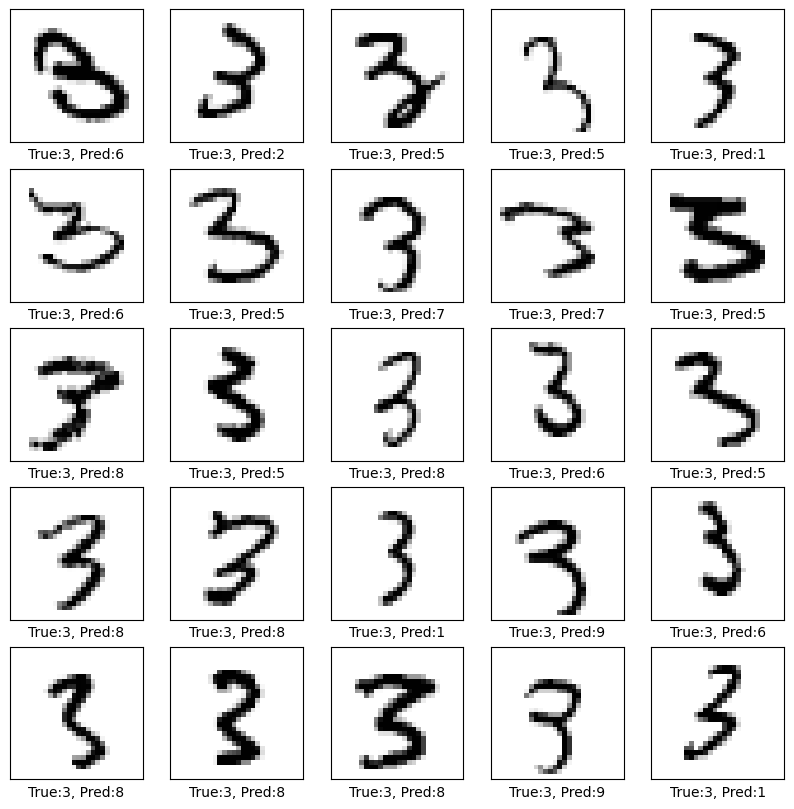

In [16]:
# Plot some misclassified images from a given target (or predicted) class
target_class = 3
misclassified_indices_class = np.where((predicted_classes != y_test) & (y_test == target_class))[0]
#misclassified_indices_class = np.where((predicted_classes != y_test) & (predicted_classes == target_class))[0]



# Display the first 25 misclassified images for the target class
plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_indices_class))):
    index = misclassified_indices_class[i]
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(f"True:{y_test[index]}, Pred:{predicted_classes[index]}")
plt.show()


## Save the model (and load it again)

In [17]:

import datetime
import os
model_dir = "./models/"

# Ensure the directory exists
if not os.path.exists(os.path.dirname(model_dir)):
    os.makedirs(os.path.dirname(model_dir))

# model_name = "mymodel.keras"
model_name = model_dir + "mnist_mlp_"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + ".keras"

# Save the model
model.save(model_name)

In [18]:
# Load the model
loaded_model = keras.models.load_model(model_name)

# Evaluate the loaded model
loaded_model.evaluate(x_test, y_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0320 - loss: 1.0320


[0.9586014747619629, 0.9586014747619629]

# Restart the model:

In [19]:
# Set seeds for reproducibility
import numpy as np
import random
import tensorflow as tf
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 2.2396 - loss: 2.2396 - val_accuracy: 1.9084 - val_loss: 1.9084
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.8209 - loss: 1.8209 - val_accuracy: 1.5847 - val_loss: 1.5847
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.5157 - loss: 1.5157 - val_accuracy: 1.3317 - val_loss: 1.3317
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.2800 - loss: 1.2800 - val_accuracy: 1.1412 - val_loss: 1.1412
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.1039 - loss: 1.1039 - val_accuracy: 1.0002 - val_loss: 1.0002


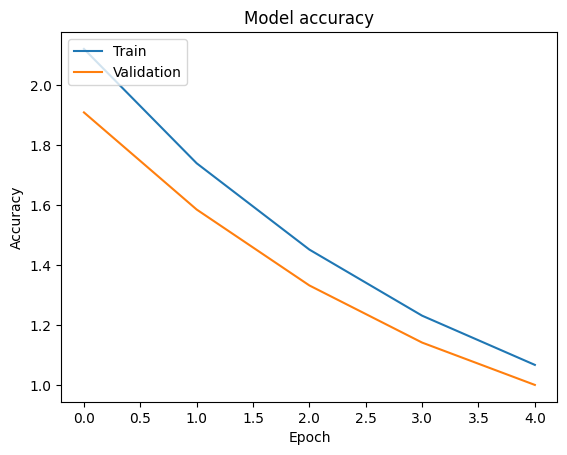

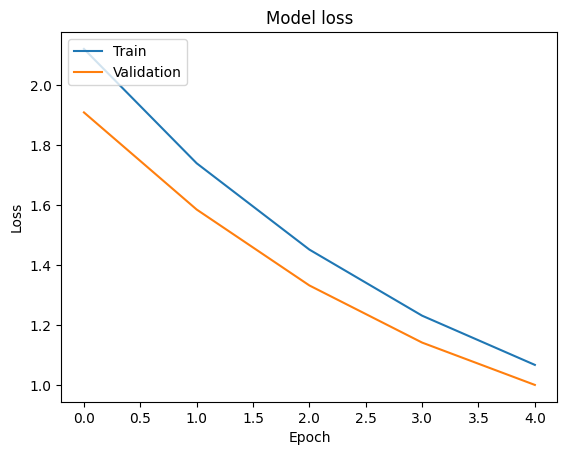

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0410 - loss: 1.0410
Test accuracy: 0.9728984236717224 
Test loss: 0.9728984236717224
Number of misclassified images: 1734 out of 10000 , accuracy 0.9728984236717224


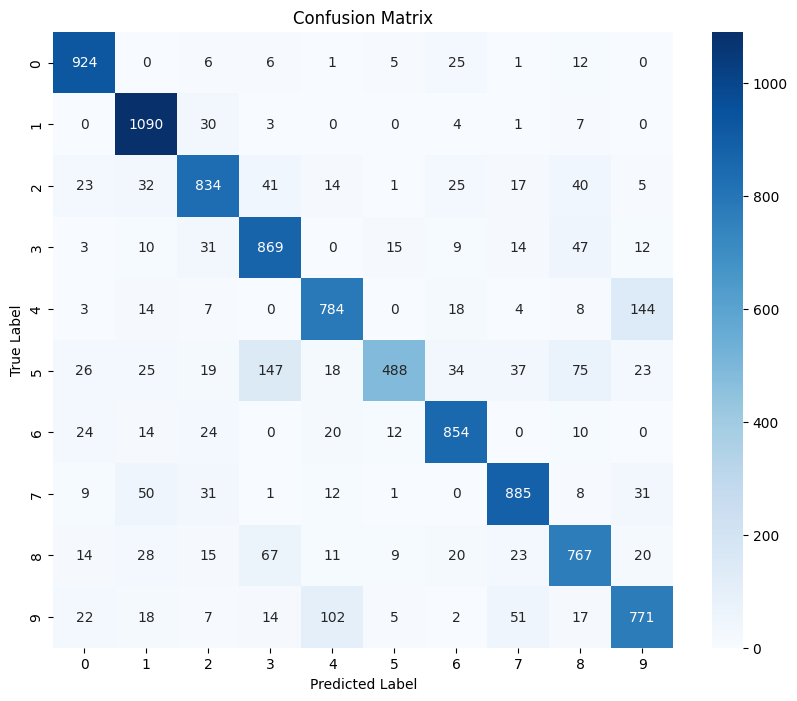

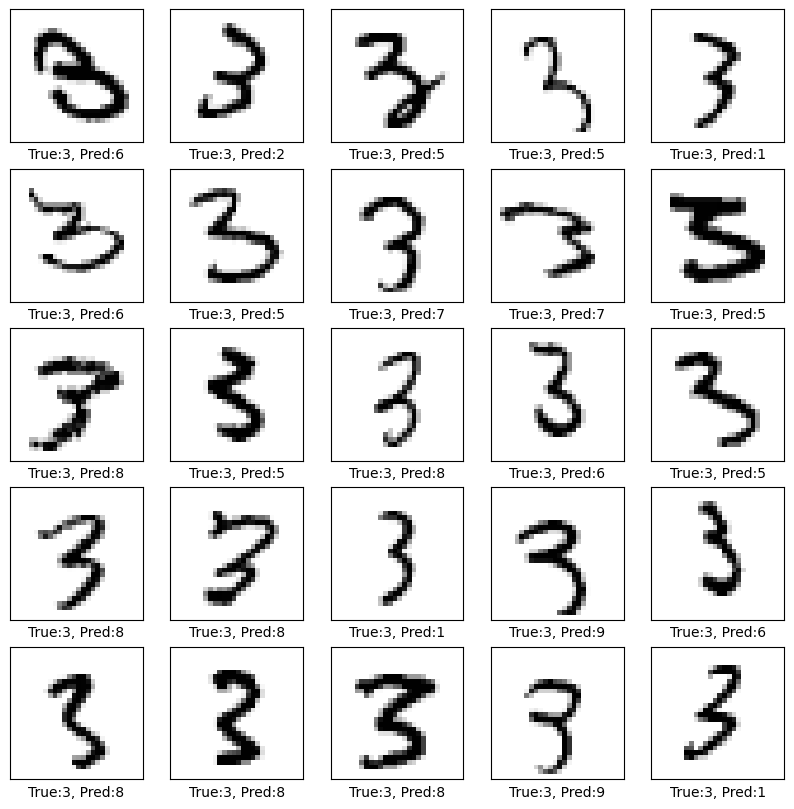

In [20]:

model = keras.Sequential([
    keras.layers.InputLayer(shape=(28 * 28,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# set model parameters:
model.compile(optimizer= keras.optimizers.SGD(learning_rate = 0.001), # 'sgd'
              loss= keras.losses.SparseCategoricalCrossentropy(), #'sparse_categorical_crossentropy',
              metrics= [keras.metrics.SparseCategoricalCrossentropy("accuracy")] )#['accuracy'])

# optimizer ... training algorithm
# loss ... error/loss function
# metrics ... for evaluation

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

# Make predictions on test data
predictions = model.predict(x_test)
print(predictions[:2])

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)

# Misclassified indices:
misclassified_indices = np.where(predicted_classes != y_test)[0]
num_misclassified = len(misclassified_indices)
print("Number of misclassified images:", num_misclassified, "out of", len(y_test), ", accuracy", test_acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot some misclassified images from a given target (or predicted) class
target_class = 3
misclassified_indices_class = np.where((predicted_classes != y_test) & (y_test == target_class))[0]
#misclassified_indices_class = np.where((predicted_classes != y_test) & (predicted_classes == target_class))[0]

# Display the first 25 misclassified images for the target class
plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_indices_class))):
    index = misclassified_indices_class[i]
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(f"True:{y_test[index]}, Pred:{predicted_classes[index]}")
plt.show()

# Save the model
import datetime

# Create a unique model name using the current date and time
model_name = model_dir + "mnist_mlp_"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + ".keras"
# Save the model with the generated name
model.save(model_name)


# Excersises
1. **Change the number of layers and neurons in the model.** See how this affects the accuracy of the model.
You can also experiment with different **activation functions**
in the hidden layers.
2. **Experiment with the number of epochs and the learning rate**. Plot the learning curves to see the differences.
3. **Change the loss function**.
Try using a different loss function: categorical_crossentropy with one-hot encoded y.
4. **Experiment with different batch sizes**.
Experiment with different batch sizes during training. See how this
affects the accuracy and training time of the model.
5. **Try using the alternative normalization method for the input data.** (e.g., standardization). See how this affects the model's performance.
6. **Investigate the confusion matrix**.
Analyze the confusion matrix to identify the pairs of classes
that are most frequently misclassified.
7. **Try changing the optimizer used in the model**. You can experiment with
 Adam, RMSprop, Adagrad, etc. See how this affects the accuracy and
 training time of the model.
8. **Use TensorBoard:** Set up TensorBoard to visualize your model’s performance, learning curves, and other metrics in real-time. This will help you track your experiments and analyze results more effectively during training.


### What else to mention the next time?
- callbacks to monitor and control the training process
- hyperparameter tuning
- visualize the model's internal representations
- methods that improve the model's performance (batch normalization,...)
- learning rate scheduling
- Regularization techniques (L1, L2, dropout) to prevent overfitting
- data augmentation
- crossvalidation